# Luminosities of far infared emission lines vs. Morphological and kinematical parameters in the RefL0100N1504 simulation 
Here we will compare the morphological and kinematical parameters from EAGLE galaxies and the luminosities of emission lines in the far infrared spectrum in order to determine if there is a relationship between them. In this case we will use the  RefL0100N1504 simulation.

In [1]:
import os
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import join
from astropy.table import Column
import seaborn as sns

Reading the Mophological and kinematical table

In [2]:
mk = Table.read('../../Data/Q-RefL0100N1504.csv', format = 'ascii')
# mk = Table.read('Q_Recal-L0025N0752.csv', format = 'ascii')
mk

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64
3226889,0.3736355400025354,0.053234520237536054,0.12762756569297418,0.2581218583511655,0.17711417162906362,0.0359092699554268,0.07426425178269415,0.731467244468864,3226889,30,3746210.5,47137317000.0,501801824.0,836548800.0,38.6588,0.055242997,3414,312751.16,3.3191096e-11,135158227000.0,132269515000.0,2034051580.0,850906240.0,3746210.5
5692534,0.3794680042597731,0.5923038422910913,0.15610793754870333,0.5994417898268398,0.43611017551809483,0.5020079041591864,1.1094982352667728,0.6340122442633017,5692534,30,1817607.5,11847346200.0,3186315520.0,402029440.0,28.180422,0.16878024,16957,152797.53,1.1860476e-08,29440280600.0,23684997100.0,5344727000.0,408738368.0,1817607.5
5728920,0.16199965543987083,0.2052219432748401,0.20027541288396222,0.2331522907290403,0.25826545182858085,0.14815552853321978,0.26710337487469393,0.2591651906077923,5728920,30,3630739.8,39546094000.0,86007336.0,954341060.0,42.532383,0.03533982,17211,444080.88,1.4673017e-06,56552276000.0,55504142000.0,86007336.0,958500740.0,3630739.8
10341428,0.22522403443200856,0.20635552541214863,0.13167903604289888,0.2769320448517646,0.2583036216935493,0.10033628913315595,0.24901868995134674,0.03835321337897442,10341428,30,7235433.0,88699978000.0,5952936400.0,3666815740.0,57.195385,0.5762099,2177,1307260.1,0.00045662734,660009320000.0,630488240000.0,25563289600.0,3946914050.0,10851339.0
12566238,0.39665930847987885,0.20231774499123112,0.3824629714473129,0.27186338506935526,0.37057332768210016,0.08536075303010761,0.20290823324391466,0.513724204940099,12566238,30,3615906.0,49454432000.0,207088736.0,813815230.0,47.149002,0.04838007,5300,346079.7,2.3803817e-05,179146932000.0,175577301000.0,2718052100.0,847986430.0,3615906.0
12569982,0.28957023910450475,0.07570525759439017,0.1266082892155065,0.29978039579093707,0.17969222509478536,0.051459490412017334,0.08959003605834988,0.5920203874224141,12569982,30,5574286.0,56434860000.0,314128288.0,546877820.0,39.297363,0.019524526,5311,471089.9,6.538812e-08,180827668000.0,177884692000.0,2371427580.0,565968960.0,5574286.0
12574144,0.2919201561617659,0.491544657813621,0.44694888301122293,0.5635520302420358,0.45334905326890007,0.400614675196549,0.7723461995507785,0.2122303023083452,12574144,30,3616160.5,73711436000.0,582484930.0,2220375810.0,51.5068,0.17847331,5323,765086.1,8.4485544e-07,253882925000.0,247679336000.0,3914793730.0,2283316740.0,5489157.5
12606457,0.3074881813724145,0.0709485417110457,-0.12707574753903073,0.2799876271616091,0.17633480222434897,0.033857167575799874,0.09930474211793842,0.06920872640459172,12606457,30,7245858.5,72771019000.0,622325310.0,2139672580.0,45.1679,0.0764098,5407,854483.75,2.1839597e-08,243127550000.0,236879086000.0,4078521340.0,2162742020.0,7245858.5
12609333,0.3580841248060661,0.09512776790262889,0.04490844649078729,0.1854569078842485,0.17561924751786076,0.07544455318729065,0.12800097449976852,0.7294852707782951,12609333,30,1876768.1,50598445000.0,352582656.0,909681540.0,36.18689,0.096991055,5414,162968.58,3.2437117e-07,150647734000.0,147345310000.0,2376025600.0,924526720.0,1876768.1


Reading table of luminosities

In [3]:
lu = Table.read('../../Data/total_luminosities_RECA.csv', format ='ascii')
lu

GalID,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57
float64,str6,float64,float64,float64,float64,float64,float64
11.0,Ref100,8.450187634229371,7.5256145616261705,7.332794018805233,6.499519055846627,6.394487963631868,5.817649210359375
6.0,Ref100,8.408184353712917,7.495340931392728,7.241338972536405,6.276553499541244,6.476954508915274,5.904120415425211
1.0,Ref100,8.881598281842457,7.998023008500145,7.742776555174997,6.699711844674182,6.9741835146126645,6.4130227940866025
4.0,Ref100,8.486389498348917,7.561499721498752,7.433742679825663,6.794526202400308,6.641563529971638,6.073023254238537
7165.0,Ref100,6.421892735076585,4.922430483063327,4.656849446909889,5.101645019101053,4.275201794723876,3.6662452767939766
4218.0,Ref100,6.9097527679986435,5.473485157441624,5.225584894137033,4.765516417527379,4.484329531191637,3.869753068480367
114.0,Ref100,7.3128993695140405,6.323854837410285,6.036992571343002,5.708932711355773,5.5350868370202475,4.963773671365811
16957.0,Ref100,6.786234163739494,4.756247658161439,4.539601741354448,5.20198438642167,3.810400935813723,3.2035042303316033
2754.0,Ref100,6.3732296390686765,4.677054129434367,4.449722018638346,4.719672450159394,3.9308498048343625,3.3184905898341914


Changing the luminosities table to a data frame and removing the data from simulation Ref-L0100N1504. 

In [4]:
dfl = lu.to_pandas()
indexNames = dfl[ dfl['Sim'] == 'Recal' ].index
dfl.drop(indexNames , inplace=True)


Disregarding data from star mass below 1E9. And calculating the limits to define groups of low, medium and high mass. 

In [5]:
dfm = mk.to_pandas()
dfm=dfm.drop(dfm[dfm['Mass_Star']<1E9].index)
dfm['logMStar']=np.log10(dfm['Mass_Star'])
print(dfm['logMStar'].min())
print(dfm['logMStar'].max())
print(dfm['logMStar'].min()+(dfm['logMStar'].max()-dfm['logMStar'].min())/3)
print(dfm['logMStar'].min()+2*(dfm['logMStar'].max()-dfm['logMStar'].min())/3)
print(dfm['logMStar'].min()+3*(dfm['logMStar'].max()-dfm['logMStar'].min())/3)

print(np.percentile(dfm['logMStar'],33), np.percentile(dfm['logMStar'],66))

9.00073191609314
11.651833650344704
9.884432494176995
10.768133072260849
11.651833650344704
9.367971743838858 9.88722593897729


Changing back to a astropy' table

In [6]:
lu = Table.from_pandas(dfl)
mk = Table.from_pandas(dfm)

Joining the two tables 

In [7]:
mk_lu = join(mk,lu,keys='GalID')
mk_lu

GalaxyID,DMEllipticity,DiscToTotal,DispAnisotropy,Ellipticity,KappaCoRot,MedOrbitCircu,RotToDispRatio,Triaxiality,GalaxyID_1,ApertureSize,Mass_BH,Mass_DM,Mass_Gas,Mass_Star,VelDisp,SFR,GalID,MasaANegroSubGrid,AcrecionMasaANegro,Masa,MasaMateriaOscura,MasaGas,MasaEstrella,MasaANegro,logMStar,Sim,logLCII,logLNII_205,logLNII_122,logLOI_145,logLOIII_88,logLNIII_57
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str6,float64,float64,float64,float64,float64,float64
21109760,0.2892753387083581,0.01310135781603905,0.2691530802645459,0.47611764490627795,0.1758689272506667,0.005944502800483662,0.010932580574129465,0.9445977410582864,21109760,30,4415859700.0,1483264490000.0,32754356200.0,419670131000.0,301.17545,3.514611,1.0,5192513500.0,0.0003212338,212385529000000.0,179181992000000.0,31954833500000.0,1235139560000.0,13545626600.0,11.622908060458828,Ref100,8.881598281842457,7.998023008500145,7.742776555174997,6.699711844674182,6.9741835146126645,6.4130227940866025
21379521,0.4670360098203262,0.013861639497244838,-0.15781894792666762,0.5843938016118366,0.1623135566375735,0.005165512306726666,0.010969365124098338,0.8448796679260223,21379521,30,10871972.0,1214449980000.0,29204351000.0,353366671000.0,309.48383,6.0781746,2.0,1670997500.0,3.094568e-07,449793436000000.0,377827266000000.0,70041907000000.0,1905425250000.0,18822572000.0,11.548225585115915,Ref100,8.700846335791727,7.822050175262917,7.565280840510923,6.5228917581151755,6.88957319239785,6.322044008183843
21573586,0.4620505767030071,0.05696273796215212,0.25160837157211813,0.5049790507873873,0.19519494394761505,0.014628751570454446,0.05102430523982849,0.9692825491534175,21573586,30,2011366780.0,759558440000.0,12756882400.0,289014579000.0,278.738,0.85262173,3.0,2733858300.0,0.0007321713,311128471000000.0,263063542000000.0,46387450000000.0,1665041560000.0,12437305300.0,11.460919750782688,Ref100,8.102660710332865,7.176698080884154,7.007512632714062,6.229489886365597,6.256268132523485,5.685925905750241
21730535,0.394156678933703,0.006600314137091612,0.33585909363576016,0.5774414722153304,0.17269760342073615,0.003522500902087179,0.005503755137211018,0.9051700043060035,21730535,30,7244372.5,1122822000000.0,21508462600.0,448573538000.0,282.0453,2.198527,4.0,1010320510.0,7.255283e-09,298877412000000.0,252773287000000.0,44226205000000.0,1865953970000.0,11993590800.0,11.651833650344704,Ref100,8.486389498348917,7.561499721498752,7.433742679825663,6.794526202400308,6.641563529971638,6.073023254238537
21924775,0.1618023952725801,0.18724176911886004,-0.0014519595480431136,0.26896978280751493,0.20272410155462534,0.06784472075216384,0.21542909659049528,0.48715747217571614,21924775,30,956294400.0,683297140000.0,9872827400.0,201371533000.0,211.56238,1.3632219,5.0,1392765700.0,4.217756e-06,201850645000000.0,171105071000000.0,29936396000000.0,802657270000.0,6524839900.0,11.303998076273057,Ref100,8.19504314972121,7.3016122937564445,7.099085225376126,6.204137256035438,6.452755259032283,5.886289757790013
21986361,0.32487531582384477,0.037843856193816916,0.15023888625935533,0.5152156677956063,0.16989659005723062,0.005721020474932512,0.036402096434782746,0.8400385701013658,21986361,30,2009535620.0,1073910580000.0,19819280400.0,372940472000.0,348.57043,0.8519436,6.0,2901399550.0,0.010208744,203058202000000.0,172676191000000.0,29079743000000.0,1291892690000.0,10382144500.0,11.571639516138218,Ref100,8.408184353712917,7.495340931392728,7.241338972536405,6.276553499541244,6.476954508915274,5.904120415425211
19634929,0.2805217631786302,0.06904888477022408,0.13172022962123142,0.5672938441362179,0.18902099665321057,0.024169419876631317,0.07645063930680478,0.3861197669686349,19634929,30,331938016.0,855587820000.0,22886287400.0,328192950000.0,235.30385,12.826736,8.0,618505540.0,0.0013978758,103324246000000.0,88118594000000.0,14498620500000.0,702997660000.0,4041070080.

Defining two functions

In [8]:
def alpha (E, T):
    return (E**2 + 1 - T )/2

def masa (a,b):
    return a/b

Adding new columns to the table using the functions decribed above and setting the three groups acording to the mass

In [9]:
mk_lu['Alpha']=alpha(mk_lu['Ellipticity'], mk_lu['Triaxiality'])
mk_lu['SFR/SM']=masa(mk_lu['SFR'], mk_lu['Mass_Star'])
mk_lu
mk_lu['logMStar']=np.log10(mk_lu['Mass_Star'])
grupo1=np.logical_and(mk_lu['logMStar']>9, mk_lu['logMStar']<9.36453186705459)
grupo2=np.logical_and(mk_lu['logMStar']>9.36453186705459, mk_lu['logMStar']<10.01875327552434)
grupo3=np.logical_and(mk_lu['logMStar']>10.01875327552434, mk_lu['logMStar']<10.85251655334973)

Cheking columns of the table

In [10]:
mk_lu.columns

<TableColumns names=('GalaxyID','DMEllipticity','DiscToTotal','DispAnisotropy','Ellipticity','KappaCoRot','MedOrbitCircu','RotToDispRatio','Triaxiality','GalaxyID_1','ApertureSize','Mass_BH','Mass_DM','Mass_Gas','Mass_Star','VelDisp','SFR','GalID','MasaANegroSubGrid','AcrecionMasaANegro','Masa','MasaMateriaOscura','MasaGas','MasaEstrella','MasaANegro','logMStar','Sim','logLCII','logLNII_205','logLNII_122','logLOI_145','logLOIII_88','logLNIII_57','Alpha','SFR/SM')>

Setting the parameters to be plotted

In [11]:
mkparam0=['VelDisp', 'Alpha']
mkparam=['RotToDispRatio', 'SFR', 'Mass_BH', 'SFR/SM']
luparam=['logLCII','logLNII_205','logLOI_145','logLOIII_88']
colors = ['firebrick', 'red', 'dimgrey', 'gray', 'darkgray', 'silver']
markers = ['^','o','s']

Graphing parameters vs. parameters

In [12]:
sns.set()
sns.set_style("white")
sns.set_context("talk")

<ipython-input-13-cbb5b9c79720>:20: RuntimeWarning: divide by zero encountered in log10
  ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],


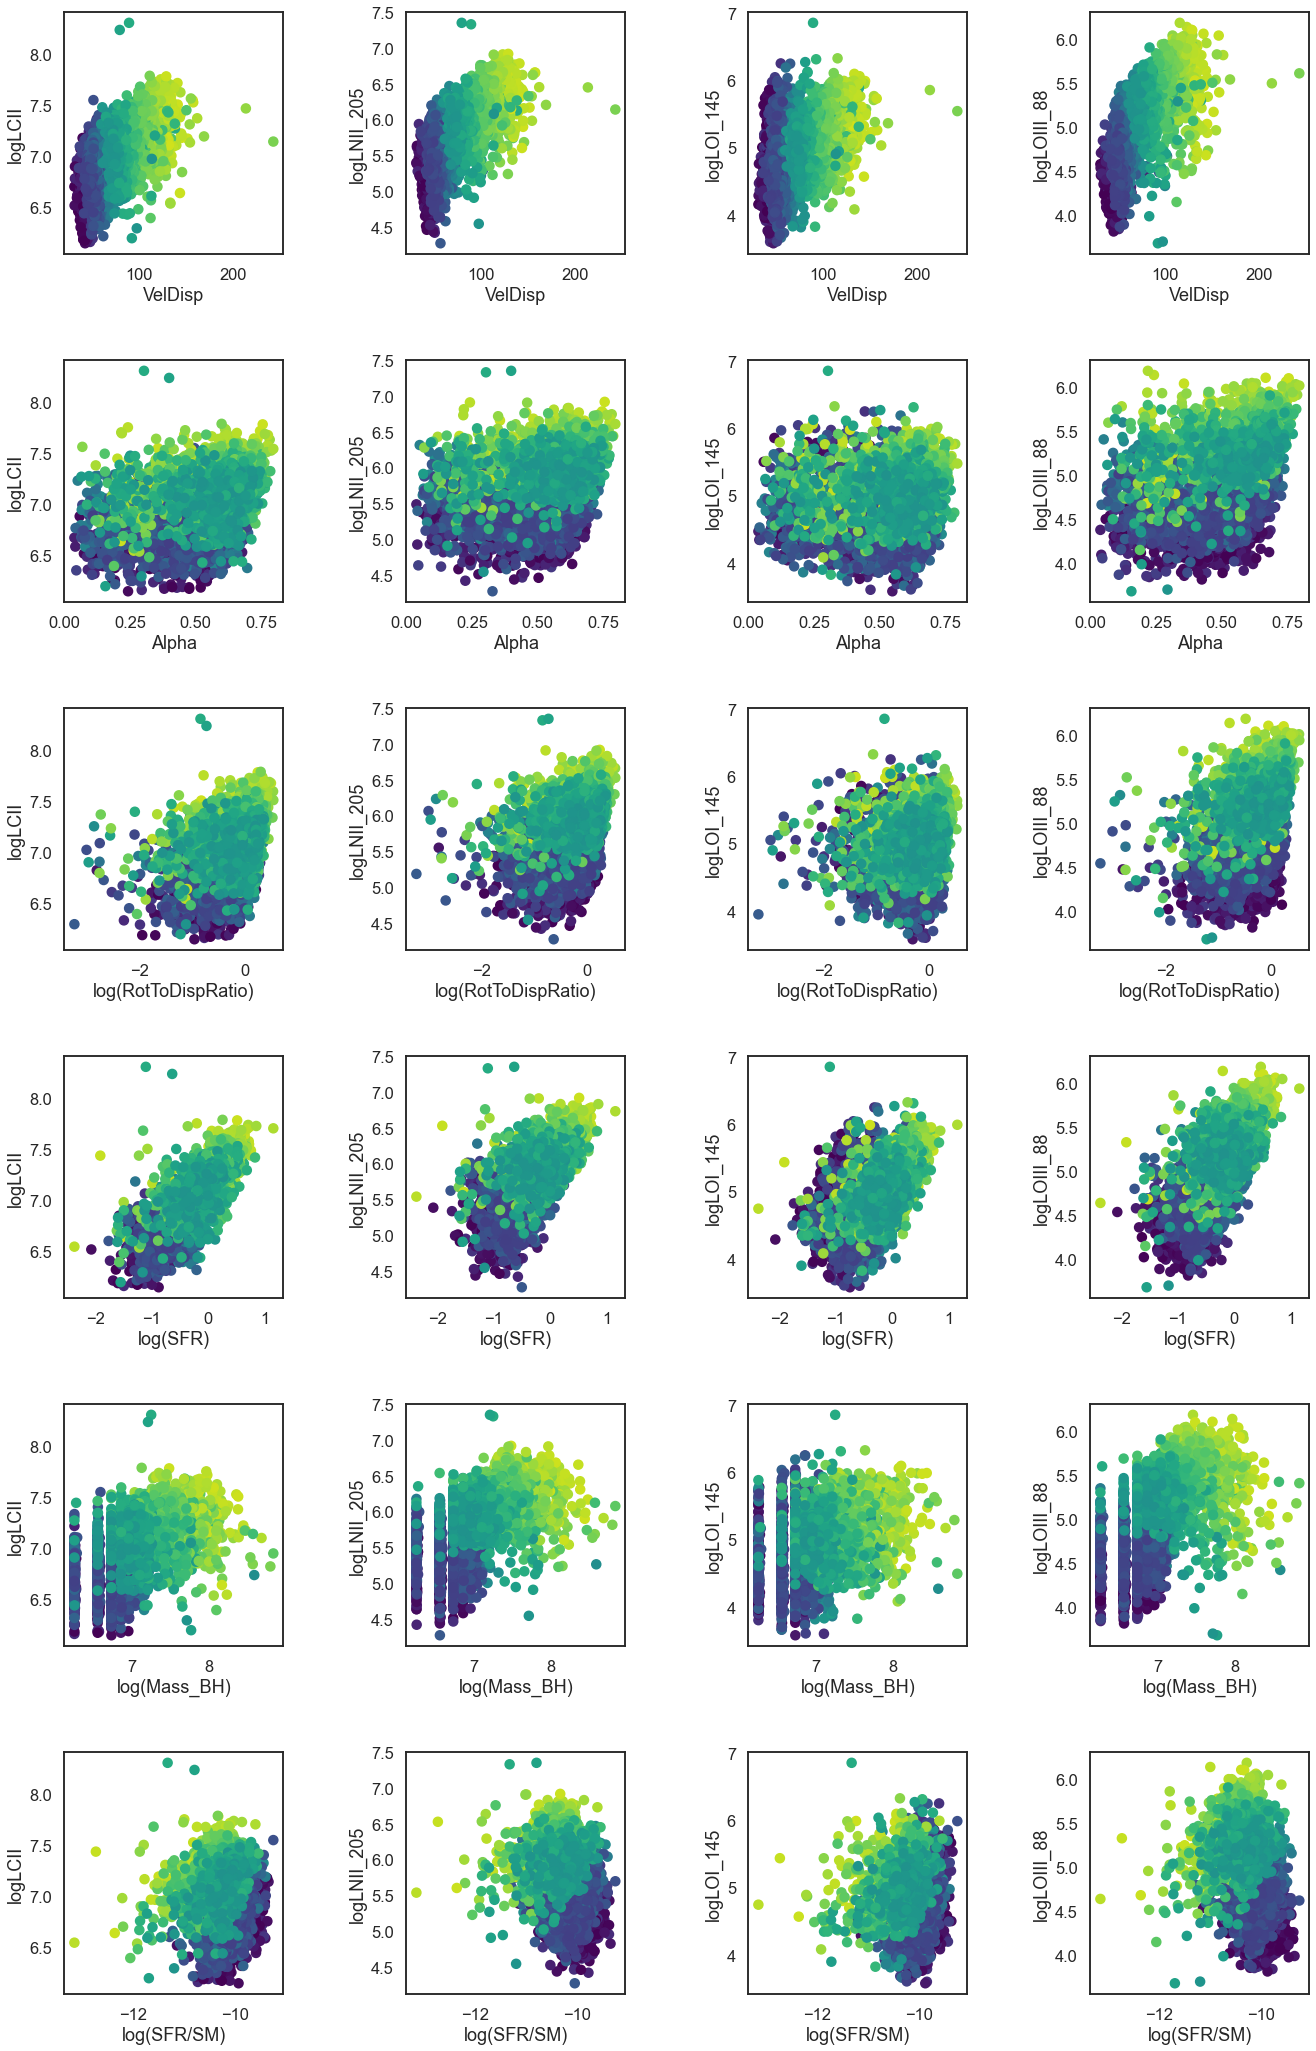

In [13]:
fig, ax = plt.subplots(6,4,figsize=(20,30), facecolor= 'white')
fig.tight_layout(pad=4)

for i_grp, grp in enumerate([grupo1, grupo2, grupo3]):
    for i_m,mparam in enumerate(mkparam0):
        for i,cparam in enumerate(colors):
            if i==i_m:
                for i_lp, lparam in enumerate(luparam): 
                    ax[i_m,i_lp].scatter(mk_lu[mparam][grp],mk_lu[lparam][grp],
                                         c=mk_lu['logMStar'][grp], vmin=9, vmax=11, cmap='viridis')
                    ax[i_m,i_lp].set_xlabel(mparam)
                    ax[i_m,i_lp].set_ylabel(lparam)



    for i_m, mparam in enumerate(mkparam, start=2):
        for i,cparam in enumerate(colors):
            if i==i_m:
                for i_lp, lparam in enumerate(luparam): 
                    ax[i_m,i_lp].scatter(np.log10(mk_lu[mparam][grp]),mk_lu[lparam][grp],
                                         c=mk_lu['logMStar'][grp], vmin=9, vmax=11, cmap='viridis')
                    ax[i_m,i_lp].set_xlabel("log("+mparam+")")
                    ax[i_m,i_lp].set_ylabel(lparam)




In [14]:
fig.savefig('../Figures/Ref.pdf')
fig.savefig('../Figures/Ref.jpg')